In [1]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot

import pandas as pd
import numpy as np
import datetime as dt
from collections import defaultdict
import time
import datetime as dt
from pytz import timezone
tz = timezone('EST')
from tqdm import tqdm

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.set()

In [2]:
nemassbost2011 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2011_smd_hourly.xls")
nemassbost2011 = pd.read_excel(nemassbost2011, 'NEMASSBOST')
nemassbost2012 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2012_smd_hourly.xls")
nemassbost2012 = pd.read_excel(nemassbost2012, 'NEMASSBOST')
nemassbost2013 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2013_smd_hourly.xls")
nemassbost2013 = pd.read_excel(nemassbost2013, 'NEMASSBOST')
nemassbost2014 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2014_smd_hourly.xls")
nemassbost2014 = pd.read_excel(nemassbost2014, 'NEMASSBOST')
nemassbost2015 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2015_smd_hourly.xls")
nemassbost2015 = pd.read_excel(nemassbost2015, 'NEMASSBOST')
nemassbost2016 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2016_smd_hourly.xls")
nemassbost2016 = pd.read_excel(nemassbost2016, 'NEMA')

In [3]:
nemassbost2017 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2017_smd_hourly.xlsx", 'NEMA')
nemassbost2018 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2018_smd_hourly.xlsx", 'NEMA')
nemassbost2019 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2019_smd_hourly.xlsx", 'NEMA')
nemassbost2020 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2020_smd_hourly.xlsx", 'NEMA')
nemassbost2021 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2021_smd_hourly.xlsx", 'NEMA')
nemassbost2022 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2022_smd_hourly.xlsx", 'NEMA')

In [4]:
nemassbost2022

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2022-01-01,1,2293.0,2171.821,33.01,32.35,0.23,0.43,26.26,25.95,0.0,0.31,46,44
1,2022-01-01,2,2213.3,2093.030,33.03,32.31,0.28,0.44,26.21,25.87,0.0,0.34,45,44
2,2022-01-01,3,2113.4,2025.558,31.25,30.85,0.00,0.40,27.85,27.50,0.0,0.35,45,44
3,2022-01-01,4,2094.7,1983.638,30.06,29.69,0.00,0.37,25.47,25.13,0.0,0.34,45,44
4,2022-01-01,5,2098.1,1980.257,31.26,30.86,0.00,0.40,29.66,29.27,0.0,0.39,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2022-01-31,20,3397.3,3431.972,227.75,226.40,0.00,1.35,297.63,295.80,0.0,1.83,26,11
740,2022-01-31,21,3277.7,3332.719,203.77,202.82,0.00,0.95,265.60,264.21,0.0,1.39,26,10
741,2022-01-31,22,3108.5,3181.992,184.25,183.42,0.00,0.83,253.17,251.93,0.0,1.24,25,11
742,2022-01-31,23,2929.9,2993.214,180.74,179.93,0.00,0.81,191.40,190.96,0.0,0.44,23,10


In [5]:
val2011 = nemassbost2011['DEMAND']
val2012 = nemassbost2012['DEMAND']
val2013 = nemassbost2013['DEMAND']
val2014 = nemassbost2014['DEMAND']
val2015 = nemassbost2015['DEMAND']
val2016 = nemassbost2016['RT_Demand']
val2017 = nemassbost2017['RT_Demand']
val2018 = nemassbost2018['RT_Demand']
val2019 = nemassbost2019['RT_Demand']
val2020 = nemassbost2020['RT_Demand']
val2021 = nemassbost2021['RT_Demand']
val2022 = nemassbost2022['RT_Demand']

In [6]:
values = [val2011, val2012, val2013, val2014, val2015, val2016, val2017, val2018, val2019, val2020, val2021, val2022]
values_df = pd.concat(values, axis=0, ignore_index=False)
values_df = values_df.reset_index()
period = len(values_df)

In [7]:
rng = pd.date_range('2011-01-01', periods=period, freq='1H')
date_df = pd.DataFrame({ 'ds': rng})
date_df = date_df.reset_index()

In [8]:
frames = [date_df, values_df]
nemassbost_load = pd.concat(frames, axis=1, ignore_index=False)
nemassbost_load = nemassbost_load.rename(columns={nemassbost_load.columns[1]: 'ds', nemassbost_load.columns[3]: 'y'})
frames2 = [nemassbost_load['ds'], nemassbost_load['y']]
nemassbost_load = pd.concat(frames2, axis=1, ignore_index=False)
nemassbost_load

,ds,y
0,2011-01-01 00:00:00,2474.000
1,2011-01-01 01:00:00,2367.000
2,2011-01-01 02:00:00,2282.000
3,2011-01-01 03:00:00,2231.000
4,2011-01-01 04:00:00,2212.000
...,...,...
97171,2022-01-31 19:00:00,3431.972
97172,2022-01-31 20:00:00,3332.719
97173,2022-01-31 21:00:00,3181.992
97174,2022-01-31 22:00:00,2993.214


In [9]:
model = Prophet(
        changepoint_prior_scale=0.5, 
        seasonality_mode='multiplicative', 
        interval_width=0.95, 
    )
model.add_country_holidays(country_name='US')

In [10]:
model.fit(nemassbost_load)

In [11]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('nemassbost_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

# Forecasting

In [ ]:
with open('nemassbost_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

In [11]:
future_pd = m.make_future_dataframe(
        periods=365, 
        freq='D',
        include_history=False
    )
    
# make predictions
forecast_pd = m.predict(future_pd)

In [12]:
forecast_pd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97536,2022-02-16 00:00:00,2477.856424,1895.421955,3013.725683
97537,2022-02-16 01:00:00,2366.653877,1816.744042,2938.663993
97538,2022-02-16 02:00:00,2299.842996,1721.691274,2865.523223
97539,2022-02-16 03:00:00,2288.794608,1762.070472,2878.195247
97540,2022-02-16 04:00:00,2348.509610,1780.105049,2914.531632


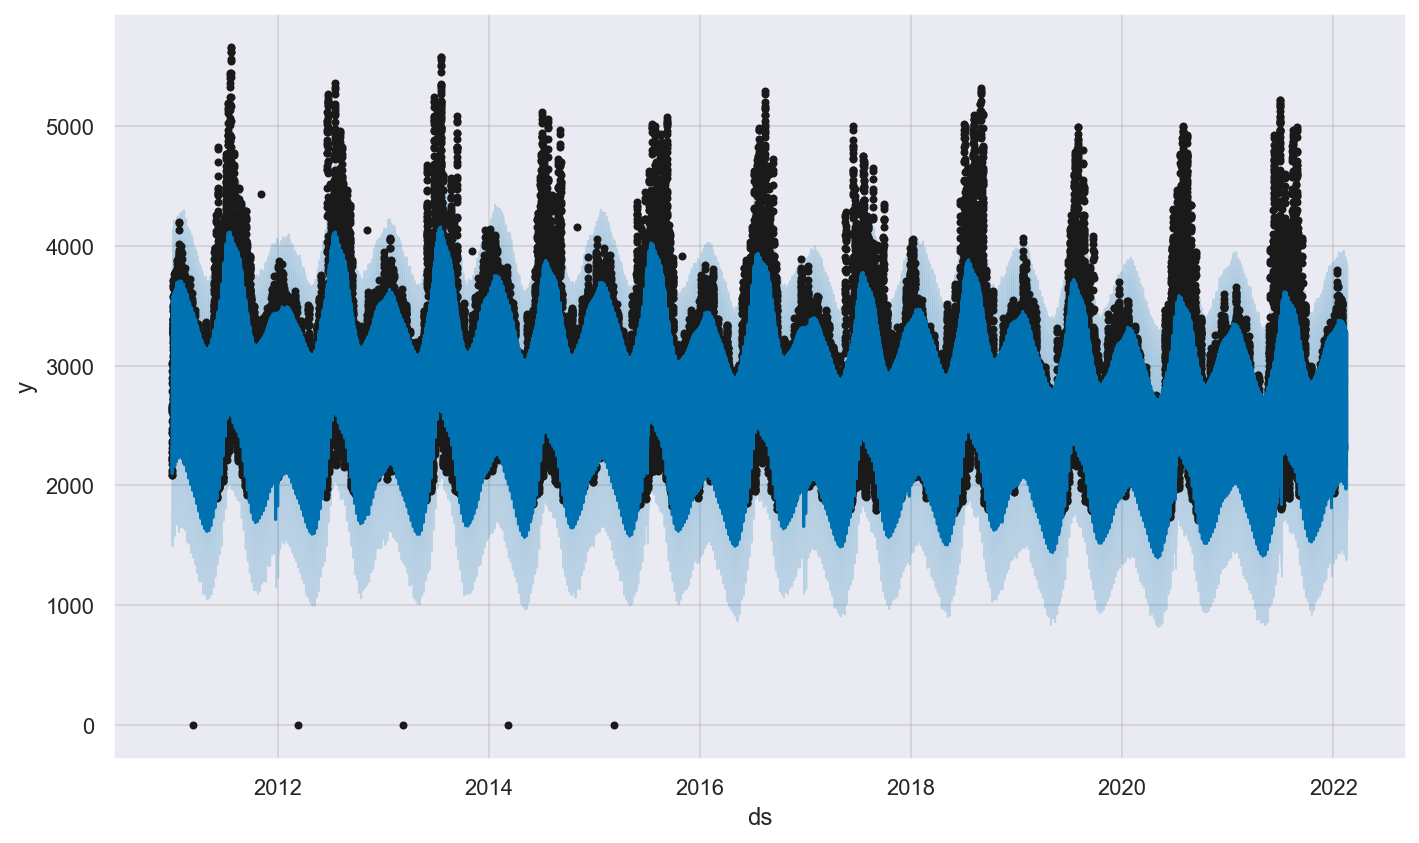

In [13]:
fig1 = model.plot(forecast_pd)

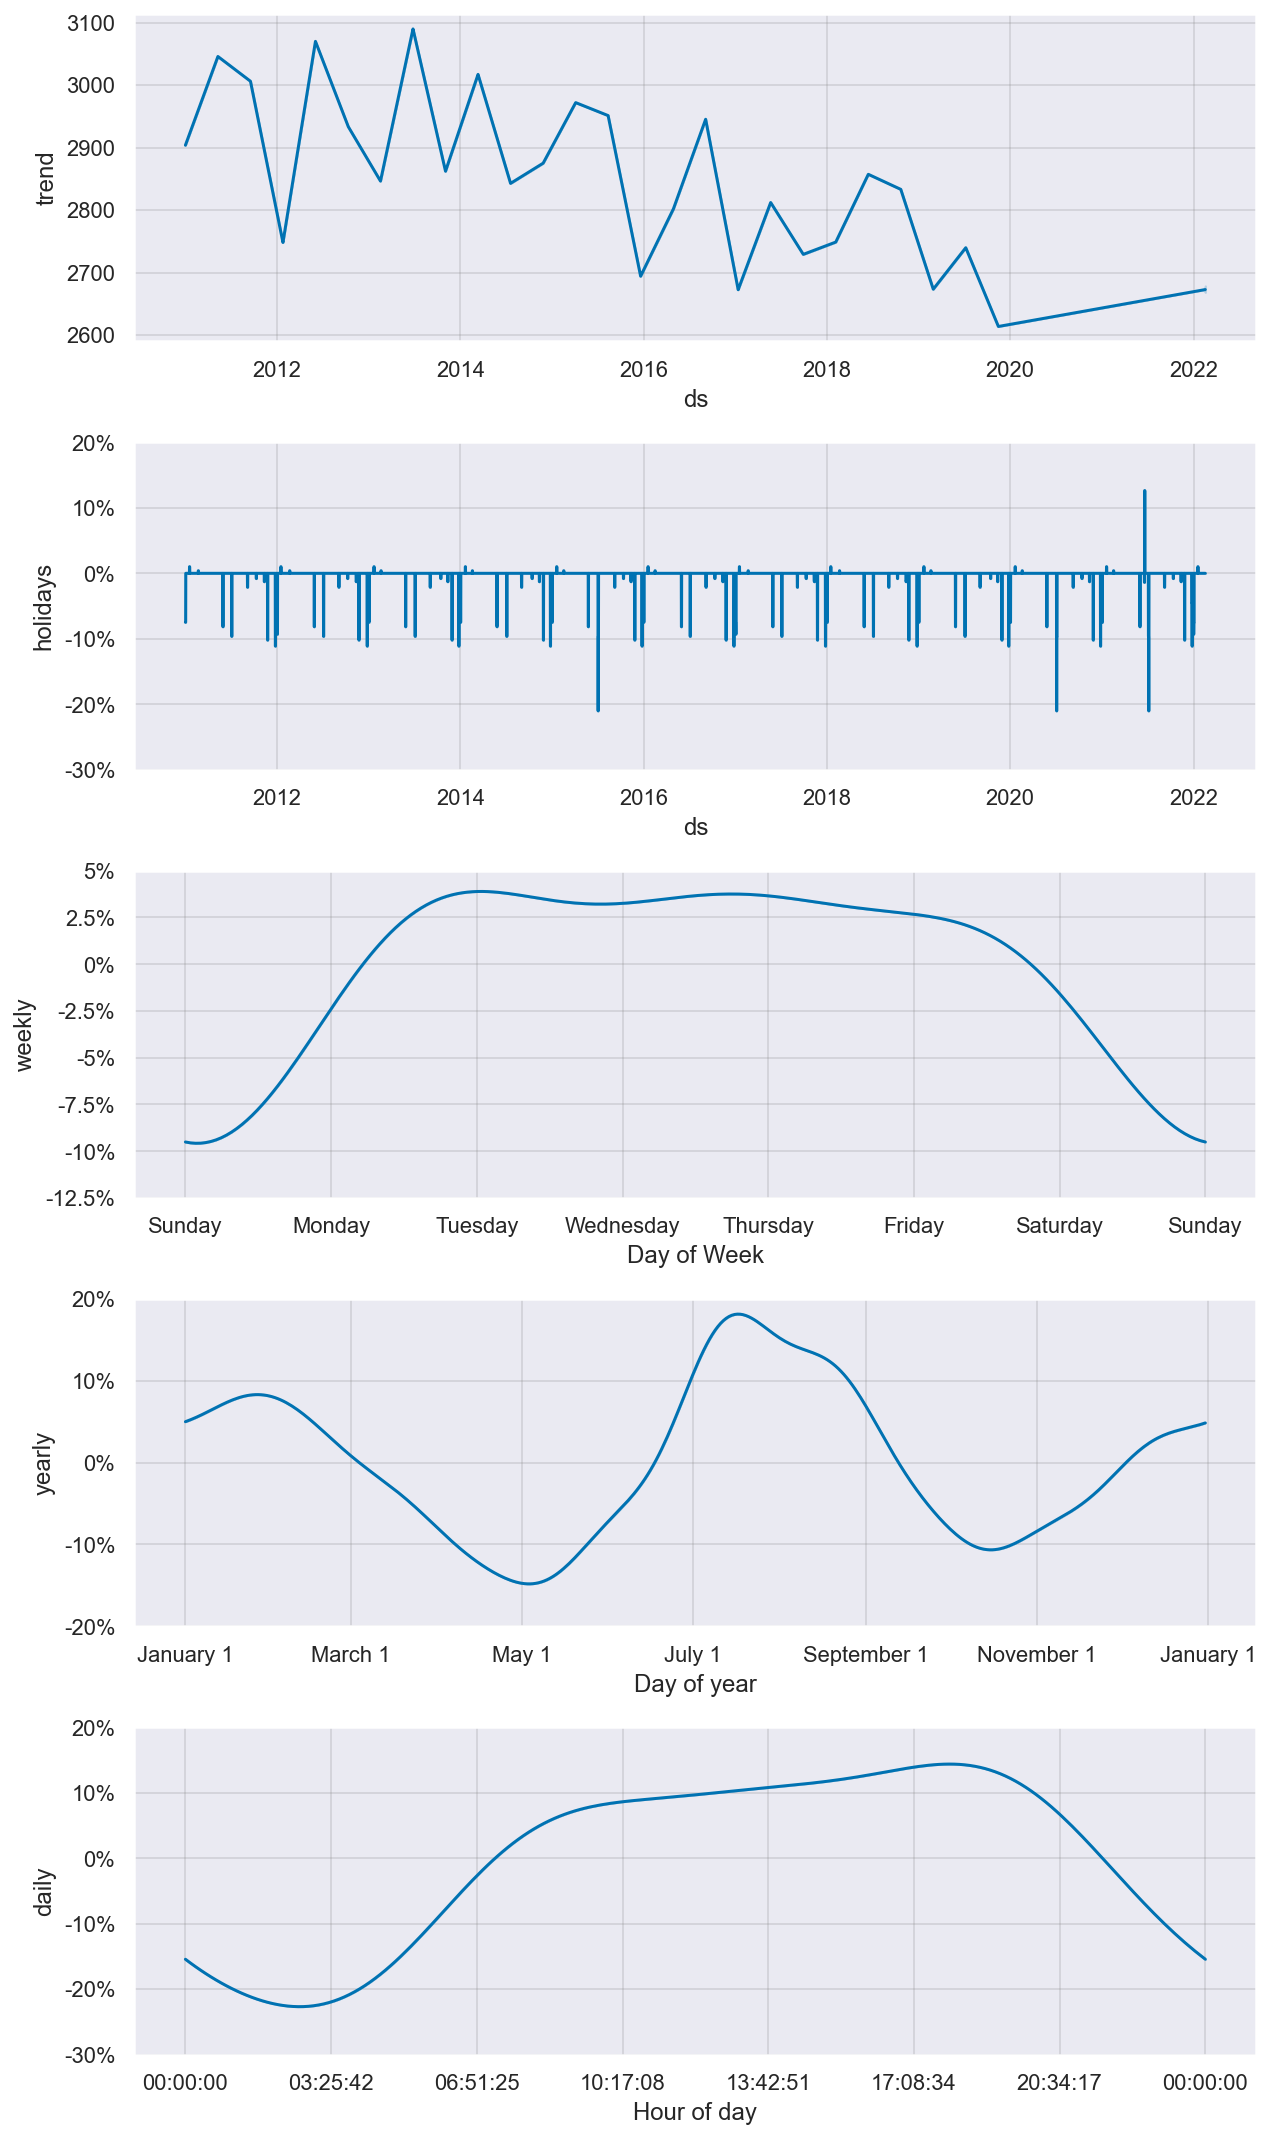

In [14]:
fig2 = model.plot_components(forecast_pd)

In [15]:
forecast_pd

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01 00:00:00,2903.728324,1766.175559,2895.101747,2903.728324,2903.728324,0.0,0.0,0.0,0.0,...,-0.015765,-0.015765,-0.015765,0.049425,0.049425,0.049425,0.0,0.0,0.0,2335.946562
1,2011-01-01 01:00:00,2903.774015,1639.676683,2824.473215,2903.774015,2903.774015,0.0,0.0,0.0,0.0,...,-0.019513,-0.019513,-0.019513,0.049475,0.049475,0.049475,0.0,0.0,0.0,2204.099877
2,2011-01-01 02:00:00,2903.819705,1495.288850,2691.770081,2903.819705,2903.819705,0.0,0.0,0.0,0.0,...,-0.023385,-0.023385,-0.023385,0.049525,0.049525,0.049525,0.0,0.0,0.0,2119.994496
3,2011-01-01 03:00:00,2903.865395,1560.419953,2633.025587,2903.865395,2903.865395,0.0,0.0,0.0,0.0,...,-0.027363,-0.027363,-0.027363,0.049576,0.049576,0.049576,0.0,0.0,0.0,2096.054307
4,2011-01-01 04:00:00,2903.911086,1614.031167,2727.892329,2903.911086,2903.911086,0.0,0.0,0.0,0.0,...,-0.031429,-0.031429,-0.031429,0.049627,0.049627,0.049627,0.0,0.0,0.0,2148.654623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97536,2022-02-16 00:00:00,2672.719377,1895.421955,3013.725683,2668.104546,2678.612327,0.0,0.0,0.0,0.0,...,0.032534,0.032534,0.032534,0.048877,0.048877,0.048877,0.0,0.0,0.0,2477.856424
97537,2022-02-16 01:00:00,2672.722362,1816.744042,2938.663993,2668.039209,2678.651019,0.0,0.0,0.0,0.0,...,0.032770,0.032770,0.032770,0.048753,0.048753,0.048753,0.0,0.0,0.0,2366.653877
97538,2022-02-16 02:00:00,2672.725348,1721.691274,2865.523223,2668.015270,2678.689711,0.0,0.0,0.0,0.0,...,0.033050,0.033050,0.033050,0.048629,0.048629,0.048629,0.0,0.0,0.0,2299.842996
97539,2022-02-16 03:00:00,2672.728334,1762.070472,2878.195247,2668.013679,2678.728403,0.0,0.0,0.0,0.0,...,0.033368,0.033368,0.033368,0.048505,0.048505,0.048505,0.0,0.0,0.0,2288.794608


In [16]:
forecast_pd.to_csv('nemassbost_forecast.csv', index=False)